In [ ]:
import math as mt
import pandas as pd
import numpy as np
import sympy as sp

pd.options.mode.chained_assignment = None


pd.set_option('display.max_columns', 60)


import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 5

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set(font_scale = 1)

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv', delimiter=',')

In [ ]:
#df.describe()
#df.info()

Data cleaning

In [ ]:
#dp = pd.DataFreame({df})
data = data.replace({'Not Available': np.nan})
data = data.replace({'Not Avai': np.nan})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [ ]:
for col in list(data.columns):

    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

Get rid of missing data and outliers

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [ ]:
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('%d columns was removed.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
11 columns was removed.


Graphs of variable dependence

In [ ]:
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

In [ ]:
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

In [ ]:
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score
correlations = features.corr()['score'].dropna().sort_values()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = geta

ValueError: Contour levels must be increasing

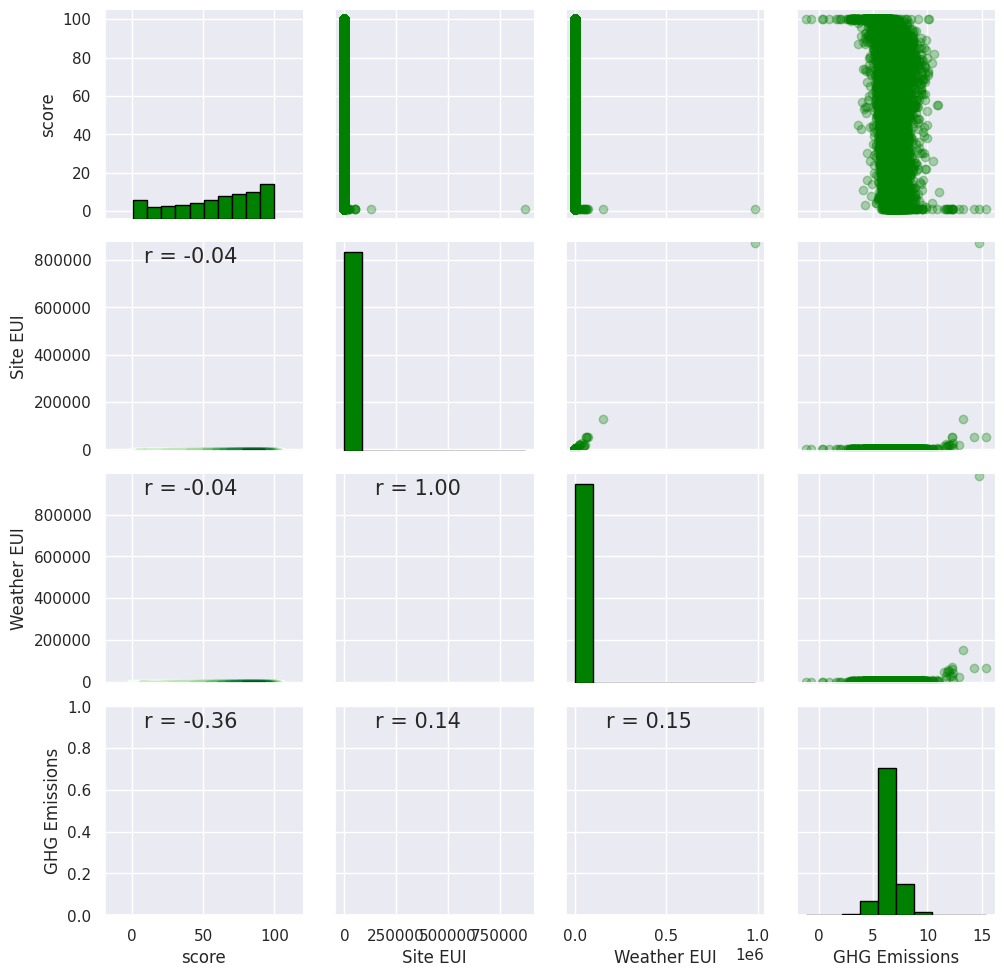

In [ ]:
numeric_subset = data.select_dtypes('number')

plot_data = features[['score', 'Site EUI (kBtu/ft²)',
                      'Weather Normalized Source EUI (kBtu/ft²)',
                      'log_Total GHG Emissions (Metric Tons CO2e)']]


plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})


plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI',
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'GHG Emissions'})
#plot_data.fo
plot_data = plot_data.dropna()


def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .9), xycoords=ax.transAxes,
                size = 15)

grid = sns.PairGrid(data = plot_data)


grid.map_upper(plt.scatter, color = 'green', alpha = 0.3)


grid.map_diag(plt.hist, color = 'green', edgecolor = 'black')


grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Greens)


plt.suptitle('Pairs Plot of Energy Data', size = 30, y = 1.02);

We create new features

In [ ]:
features = data.copy()


numeric_subset = data.select_dtypes('number')


for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])


categorical_subset = data[['Borough', 'Largest Property Use Type']]


categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = geta

(11746, 131)

Selection of features

In [ ]:
def corr_df(x, corr_val):
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]


    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        df = x.drop(col, axis=1)

    return df
features = corr_df(features, 0.6);

Weather Normalized Site Natural Gas Intensity (therms/ft²) | Site EUI (kBtu/ft²) | 0.98
Weather Normalized Site Natural Gas Intensity (therms/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 0.98
Weather Normalized Source EUI (kBtu/ft²) | Site EUI (kBtu/ft²) | 1.0
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 1.0
Fuel Oil #1 Use (kBtu) | Weather Normalized Site EUI (kBtu/ft²) | 0.95
Diesel #2 Use (kBtu) | Weather Normalized Site EUI (kBtu/ft²) | 0.86
Diesel #2 Use (kBtu) | Weather Normalized Source EUI (kBtu/ft²) | 0.61
Diesel #2 Use (kBtu) | Fuel Oil #2 Use (kBtu) | 1.0
Electricity Use - Grid Purchase (kBtu) | Weather Normalized Site Electricity Intensity (kWh/ft²) | 0.62
Weather Normalized Site Electricity (kWh) | Weather Normalized Site Electricity Intensity (kWh/ft²) | 0.62
Total GHG Emissions (Metric Tons CO2e) | District Steam Use (kBtu) | 1.0
Total GHG Emissions (Metric Tons CO2e) | Natural Gas Use (kBtu) | 0.96
Total GHG Emissions (Metric To

In [ ]:
features  = features.dropna(axis=1, how = 'all')
print(features.shape)

(11746, 129)


Evaluation of the result

In [ ]:
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

features = features.replace({np.inf: np.nan, -np.inf: np.nan})

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6749, 128)
(2893, 128)
(6749, 1)
(2893, 1)


In [ ]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 65.00
Baseline Performance on the test set: MAE = 25.3519
